# **** CHALLENGE:                             Statical for Data Science ****

Challenge Link: https://www.kaggle.com/c/estadstica-para-ciencia-de-datos

Autor: ***Keven Fernandez Carrillo***

GitHub: https://github.com/KevenRFC

# ***1. Business Understanding***

Challenge: Identify the clients with a high probability of acquiring a term deposit.

Investigation a lot of information about the business.

# ***2. Data Understanding***

#### **** 2.0 Package ****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as pylab 
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats 

%matplotlib inline
pylab.rcParams['figure.figsize'] = 8,6

# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import utilskrfcv5 as utils

In [3]:
# Target , ID
TARGET = 'Adq_Ahorro'
ID = 'coddoc'

In [4]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

#print (color.BOLD + 'Hello World !' + color.END)

## 2.1 Load Data

In [5]:
import numpy as np

In [6]:
df_train = pd.read_csv("data/Train_AdquisicionAhorro.csv",encoding='latin-1')
df_test = pd.read_csv("data/Test_AdquisicionAhorro.csv",encoding='latin-1')

In [7]:
print("----Train----")
utils.reduce_memory(df_train)
print("----Test----")
utils.reduce_memory(df_test)

----Train----
Antes 0.2 MB
Ahora 0.1 MB
----Test----
Antes 0.2 MB
Ahora 0.1 MB


In [8]:
df_train.head()

,coddoc,edad,estciv,educacion,mora,balance,vivienda,prestamo,dia,duracion,campana,pdias,previo,Adq_Ahorro
0,CODDOC0001,30,married,primaria,no,1787,no,no,19,79,1,-1,0,0
1,CODDOC0002,33,married,secundaria,no,4789,si,si,11,220,1,339,4,0
2,CODDOC0003,35,single,terciario,no,1350,si,no,16,185,1,330,1,0
3,CODDOC0004,30,married,terciario,no,1476,si,si,3,199,4,-1,0,0
4,CODDOC0006,35,single,terciario,no,747,no,no,23,141,2,176,3,0


In [9]:
df_test.head()

,coddoc,edad,estciv,educacion,mora,balance,vivienda,prestamo,dia,duracion,campana,pdias,previo
0,CODDOC0005,59,married,secundaria,no,0,si,no,5,226,1,-1,0
1,CODDOC0007,36,married,terciario,no,307,si,no,14,341,1,330,2
2,CODDOC0008,39,married,secundaria,no,147,si,no,6,151,2,-1,0
3,CODDOC0012,43,married,secundaria,no,264,si,no,17,113,2,-1,0
4,CODDOC0013,36,married,terciario,no,1109,no,no,13,328,2,-1,0


****Preview EDA****

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 14 columns):
coddoc        2240 non-null object
edad          2240 non-null int8
estciv        2240 non-null object
educacion     2240 non-null object
mora          2240 non-null object
balance       2240 non-null int32
vivienda      2240 non-null object
prestamo      2240 non-null object
dia           2240 non-null int8
duracion      2240 non-null int16
campana       2240 non-null int8
pdias         2240 non-null int16
previo        2240 non-null int8
Adq_Ahorro    2240 non-null int8
dtypes: int16(2), int32(1), int8(5), object(6)
memory usage: 133.5+ KB


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2281 entries, 0 to 2280
Data columns (total 13 columns):
coddoc       2281 non-null object
edad         2281 non-null int8
estciv       2281 non-null object
educacion    2281 non-null object
mora         2281 non-null object
balance      2281 non-null int32
vivienda     2281 non-null object
prestamo     2281 non-null object
dia          2281 non-null int8
duracion     2281 non-null int16
campana      2281 non-null int8
pdias        2281 non-null int16
previo       2281 non-null int8
dtypes: int16(2), int32(1), int8(4), object(6)
memory usage: 133.7+ KB


In [12]:
df_train.describe(include='all',percentiles=[0.01,0.05,0.25,0.50,0.75,0.95,0.99]).T

,count,unique,top,freq,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
coddoc,2240,2240,CODDOC3579,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
edad,2240,NaN,NaN,NaN,41.2281,10.5072,19,24,27,33,39.5,48,59,72,86
estciv,2240,3,married,1392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
educacion,2240,4,secundaria,1134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mora,2240,2,no,2207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,2240,NaN,NaN,NaN,1424.72,3118.41,-3313,-799.82,-217.05,63,437,1503.75,6145.95,13700.1,71188
vivienda,2240,2,si,1286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prestamo,2240,2,no,1899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dia,2240,NaN,NaN,NaN,15.9107,8.24166,1,2,3,9,16,21,29,31,31
duracion,2240,NaN,NaN,NaN,257.936,248.571,4,10,30,103,182,319.25,754.05,1170.49,3025


In [13]:
df_test.describe(include='all',percentiles=[0.01,0.25,0.50,0.75,0.99]).T

,count,unique,top,freq,mean,std,min,1%,25%,50%,75%,99%,max
coddoc,2281,2281,CODDOC1558,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
edad,2281,NaN,NaN,NaN,41.1131,10.6455,19,23,33,39,49,71.2,87
estciv,2281,3,married,1405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
educacion,2281,4,secundaria,1172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mora,2281,2,no,2238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,2281,NaN,NaN,NaN,1420.63,2899.53,-2082,-614.6,81,454,1449,14576.8,42045
vivienda,2281,2,si,1273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prestamo,2281,2,no,1931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dia,2281,NaN,NaN,NaN,15.9198,8.25536,1,2,8,16,21,31,31
duracion,2281,NaN,NaN,NaN,269.879,270.406,5,11.8,106,188,338,1441,2769


## 2.2 Exploratory Data Analysis (EDA)

In [14]:
feature_columns = {}

feature_columns['categorical'] = df_train.select_dtypes(include = ['object']).columns.values.tolist()

feature_columns['int'] = df_train.select_dtypes(include = ['integer']).columns.values.tolist()
feature_columns['float'] = df_train.select_dtypes(include = ['float32','float64']).columns.values.tolist()
feature_columns['numerical'] = feature_columns['int'] + feature_columns['float']

feature_columns

{'categorical': ['coddoc',
  'estciv',
  'educacion',
  'mora',
  'vivienda',
  'prestamo'],
 'int': ['edad',
  'balance',
  'dia',
  'duracion',
  'campana',
  'pdias',
  'previo',
  'Adq_Ahorro'],
 'float': [],
 'numerical': ['edad',
  'balance',
  'dia',
  'duracion',
  'campana',
  'pdias',
  'previo',
  'Adq_Ahorro']}

In [15]:
cols_to_drop = [ID, TARGET]
utils.drop_values_in_dicc(dicc_list_cols = feature_columns, cols_to_drop = [ID, TARGET])
feature_columns

{'categorical': ['estciv', 'educacion', 'mora', 'vivienda', 'prestamo'],
 'int': ['edad', 'balance', 'dia', 'duracion', 'campana', 'pdias', 'previo'],
 'float': [],
 'numerical': ['edad',
  'balance',
  'dia',
  'duracion',
  'campana',
  'pdias',
  'previo']}

****Target****

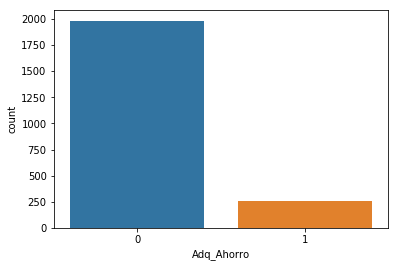

In [16]:
sns.countplot(x=TARGET, data=df_train)

In [17]:
utils.fx_distrib(df_train, TARGET)

   Adq_Ahorro  Cantidad     %Total
0           0      1982  88.482143
1           1       258  11.517857


**** Categorical Features ****

View Categorical Features distribution:

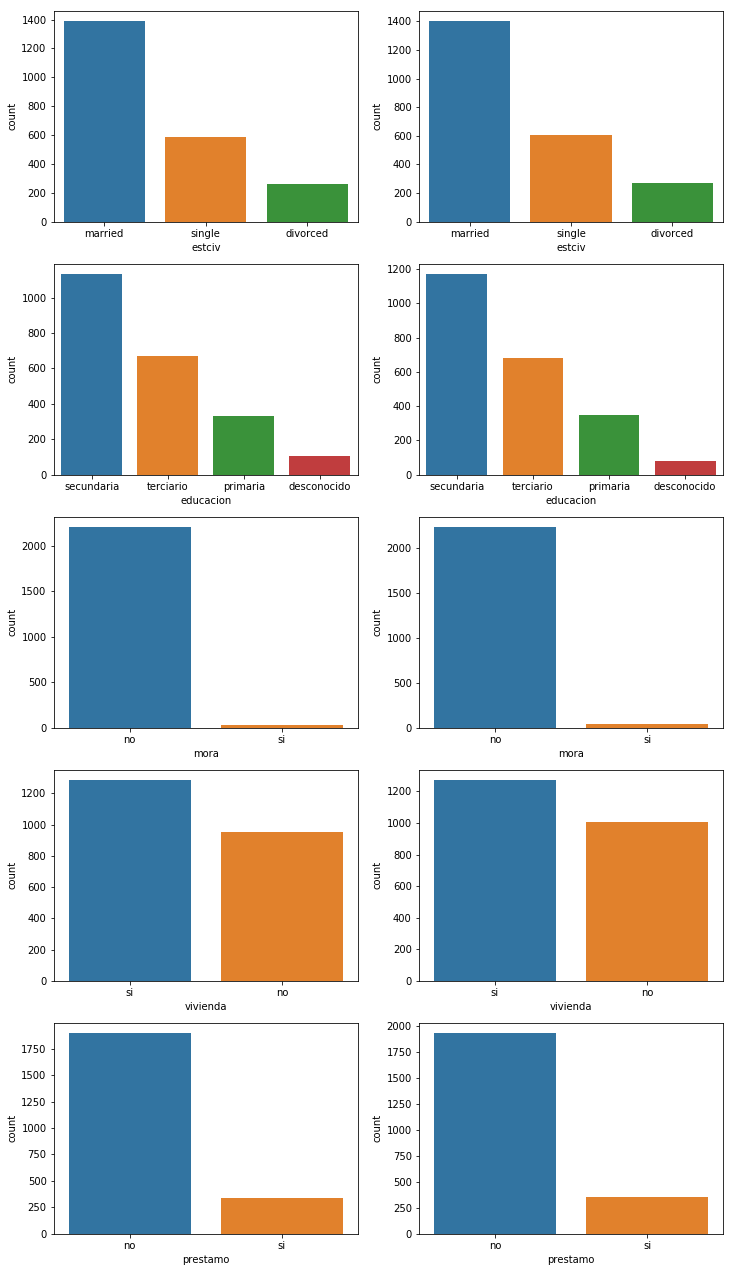

In [18]:
utils.graph_countplots(df_train, df_test, vars_to_plot = feature_columns['categorical'])

In [19]:
# Print features distributions
print("=======================================================================================")
print("Printing categorical features distributions on Training DS:\n")
for var in feature_columns['categorical']:
    utils.fx_distrib(df_train, var)
    print("--------------------------------------")

print("\n=======================================================================================\n")

Printing categorical features distributions on Training DS:

     estciv  Cantidad     %Total
0   married      1392  62.142857
1    single       588  26.250000
2  divorced       260  11.607143
--------------------------------------
     educacion  Cantidad     %Total
0   secundaria      1134  50.625000
1    terciario       669  29.866071
2     primaria       332  14.821429
3  desconocido       105   4.687500
--------------------------------------
  mora  Cantidad     %Total
0   no      2207  98.526786
1   si        33   1.473214
--------------------------------------
  vivienda  Cantidad     %Total
0       si      1286  57.410714
1       no       954  42.589286
--------------------------------------
  prestamo  Cantidad     %Total
0       no      1899  84.776786
1       si       341  15.223214
--------------------------------------




In [20]:
# Print features distributions
print("=======================================================================================")
print("Printing categorical features distributions on Testing DS:\n")
for var in feature_columns['categorical']:
    utils.fx_distrib(df_test, var)
    print("--------------------------------------")

print("\n=======================================================================================\n")

Printing categorical features distributions on Testing DS:

     estciv  Cantidad     %Total
0   married      1405  61.595791
1    single       608  26.654976
2  divorced       268  11.749233
--------------------------------------
     educacion  Cantidad     %Total
0   secundaria      1172  51.380973
1    terciario       681  29.855327
2     primaria       346  15.168786
3  desconocido        82   3.594915
--------------------------------------
  mora  Cantidad     %Total
0   no      2238  98.114862
1   si        43   1.885138
--------------------------------------
  vivienda  Cantidad     %Total
0       si      1273  55.808856
1       no      1008  44.191144
--------------------------------------
  prestamo  Cantidad     %Total
0       no      1931  84.655853
1       si       350  15.344147
--------------------------------------




Analyzing target distribution for each variable category:

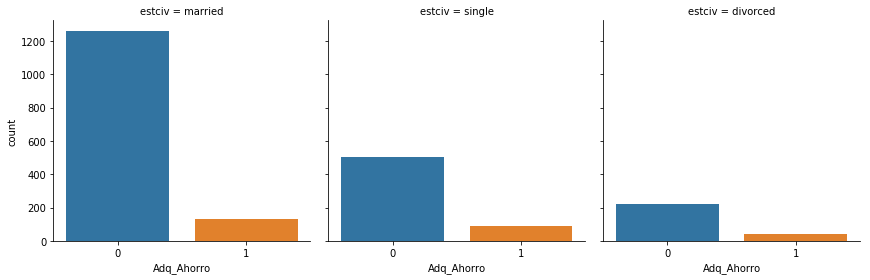

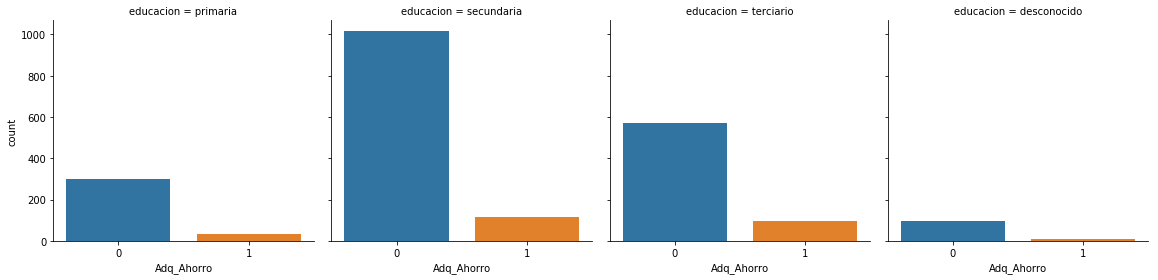

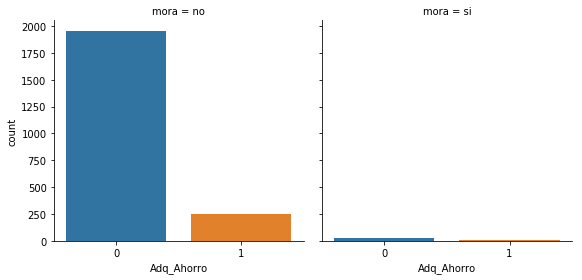

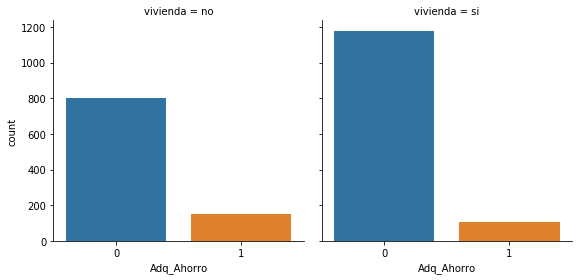

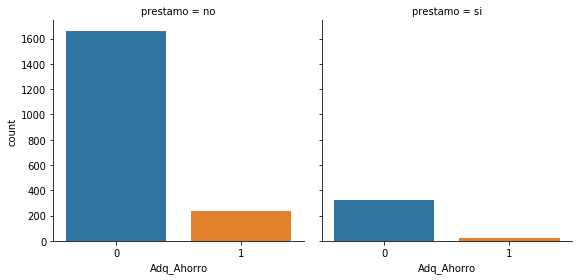

In [21]:
utils.graph_factorplots(df_train, feature_columns['categorical'], TARGET)

In [22]:
# Print features distributions
print("=======================================================================================")
print("Printing categorical features distributions on Training DS:\n")
for var in feature_columns['categorical']:
    utils.cross_target(df_train, var, TARGET)

print("\n=======================================================================================\n")

Printing categorical features distributions on Training DS:

----------------------------------------------------------------
---- Var:  estciv
   Atributo  Cantidad     %Total
0   married      1392  62.142857
1    single       588  26.250000
2  divorced       260  11.607143

     estciv % ratio_conv
0  divorced           15
2    single      14.7959
1   married      9.48276
----------------------------------------------------------------
---- Var:  educacion
      Atributo  Cantidad     %Total
0   secundaria      1134  50.625000
1    terciario       669  29.866071
2     primaria       332  14.821429
3  desconocido       105   4.687500

     educacion % ratio_conv
3    terciario      14.6487
2   secundaria      10.3175
1     primaria      9.93976
0  desconocido      9.52381
----------------------------------------------------------------
---- Var:  mora
  Atributo  Cantidad     %Total
0       no      2207  98.526786
1       si        33   1.473214

  mora % ratio_conv
1   si      18.181

****Numerical Features****

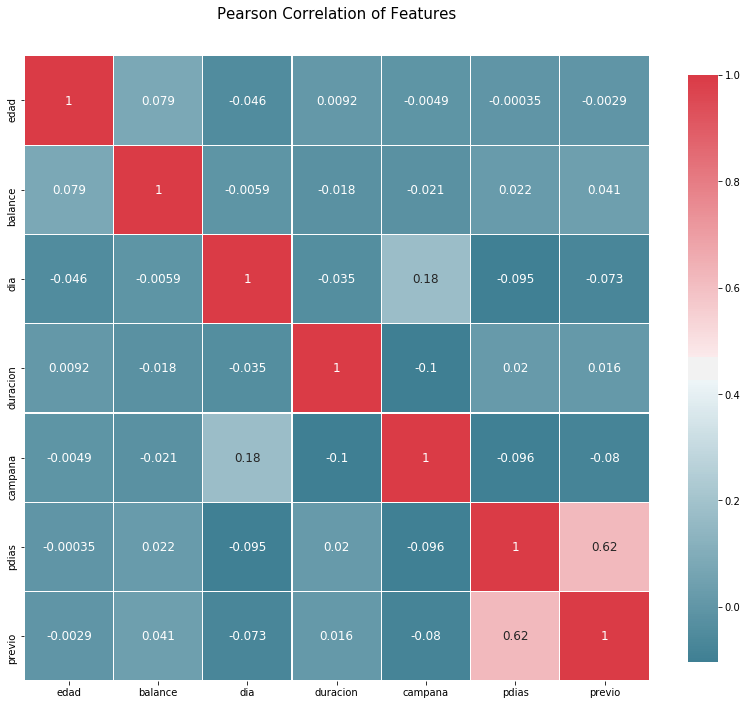

In [23]:
utils.correlation_heatmap(df_train[feature_columns['numerical']])

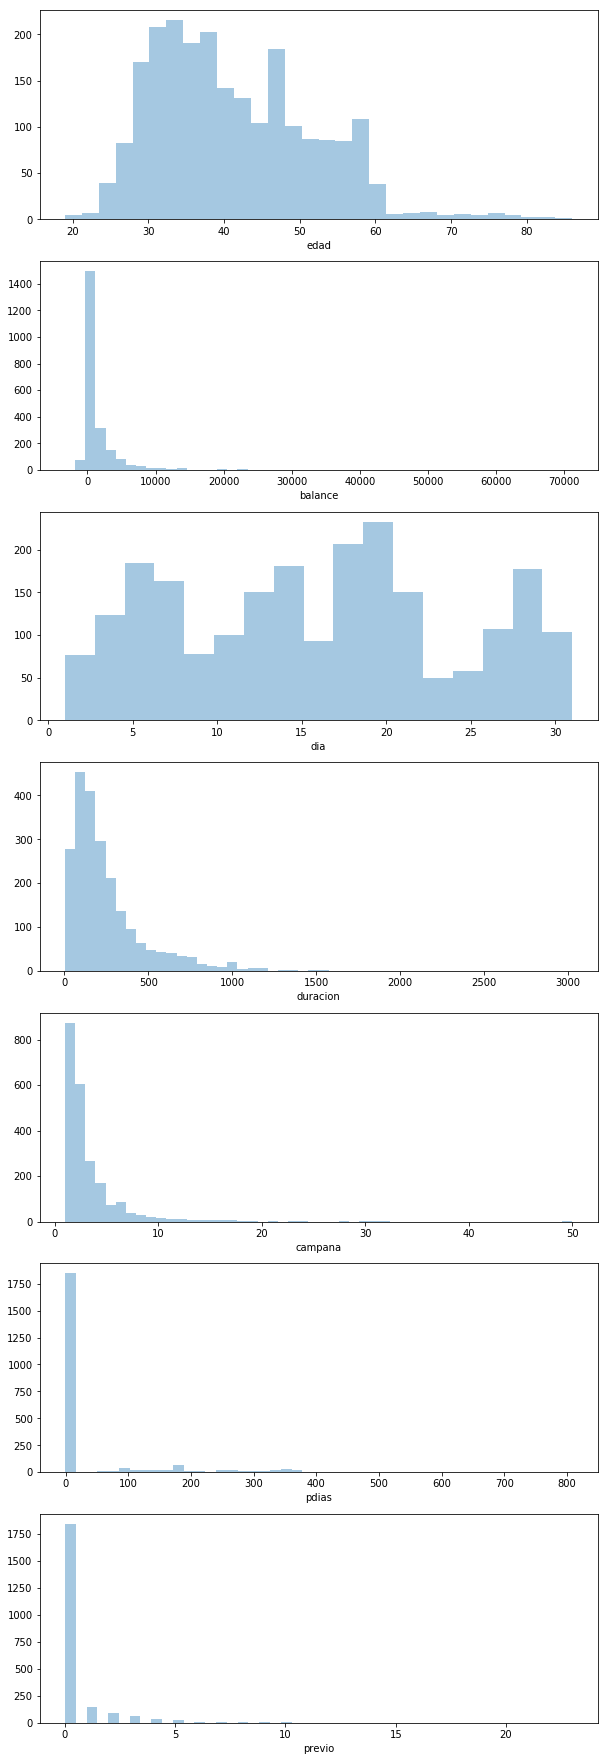

In [24]:
utils.graph_distplots(df_train, feature_columns['numerical'])

In [25]:
utils.resumen_numerical_cols(df_train, list_cols = feature_columns['numerical'], target = TARGET)

edad :

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
Adq_Ahorro,,,,,,,,,,,,
0,1982.0,41.148840,10.171153,20.0,25.00,27.00,33.0,40.0,48.0,58.0,69.19,86.0
1,258.0,41.837209,12.805210,19.0,23.57,25.85,32.0,39.0,50.0,66.3,78.86,83.0


balance :

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
Adq_Ahorro,,,,,,,,,,,,
0,1982.0,1401.742684,3154.341512,-3313.0,-759.57,-195.9,61.00,424.0,1449.5,6263.75,13745.58,71188.0
1,258.0,1601.217054,2826.630303,-1206.0,-851.09,-308.0,100.75,648.5,2176.5,5469.80,10403.58,26965.0


dia :

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
Adq_Ahorro,,,,,,,,,,,,
0,1982.0,15.968718,8.249151,1.0,2.0,3.0,9.0,16.0,21.0,29.00,31.00,31.0
1,258.0,15.465116,8.186110,1.0,1.0,2.0,10.0,15.5,21.0,29.15,30.43,31.0


duracion :

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
Adq_Ahorro,,,,,,,,,,,,
0,1982.0,222.677598,207.648546,4.0,10.00,29.0,96.00,165.0,274.75,622.00,1009.19,3025.0
1,258.0,528.794574,350.284188,78.0,92.14,105.7,254.75,438.5,731.50,1152.75,1567.03,2029.0


campana :

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
Adq_Ahorro,,,,,,,,,,,,
0,1982.0,2.919273,3.329392,1.0,1.0,1.0,1.0,2.0,3.0,8.0,16.0,50.0
1,258.0,2.162791,1.882918,1.0,1.0,1.0,1.0,2.0,2.0,6.0,9.0,17.0


pdias :

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
Adq_Ahorro,,,,,,,,,,,,
0,1982.0,34.642281,93.618442,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00,279.75,364.19,808.0
1,258.0,59.302326,102.582233,-1.0,-1.0,-1.0,-1.0,-1.0,94.75,276.05,415.00,461.0


previo :

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
Adq_Ahorro,,,,,,,,,,,,
0,1982.0,0.439455,1.413898,0.0,0.0,0.0,0.0,0.0,0.0,3.00,7.00,23.0
1,258.0,1.135659,2.256208,0.0,0.0,0.0,0.0,0.0,1.0,5.15,10.86,14.0


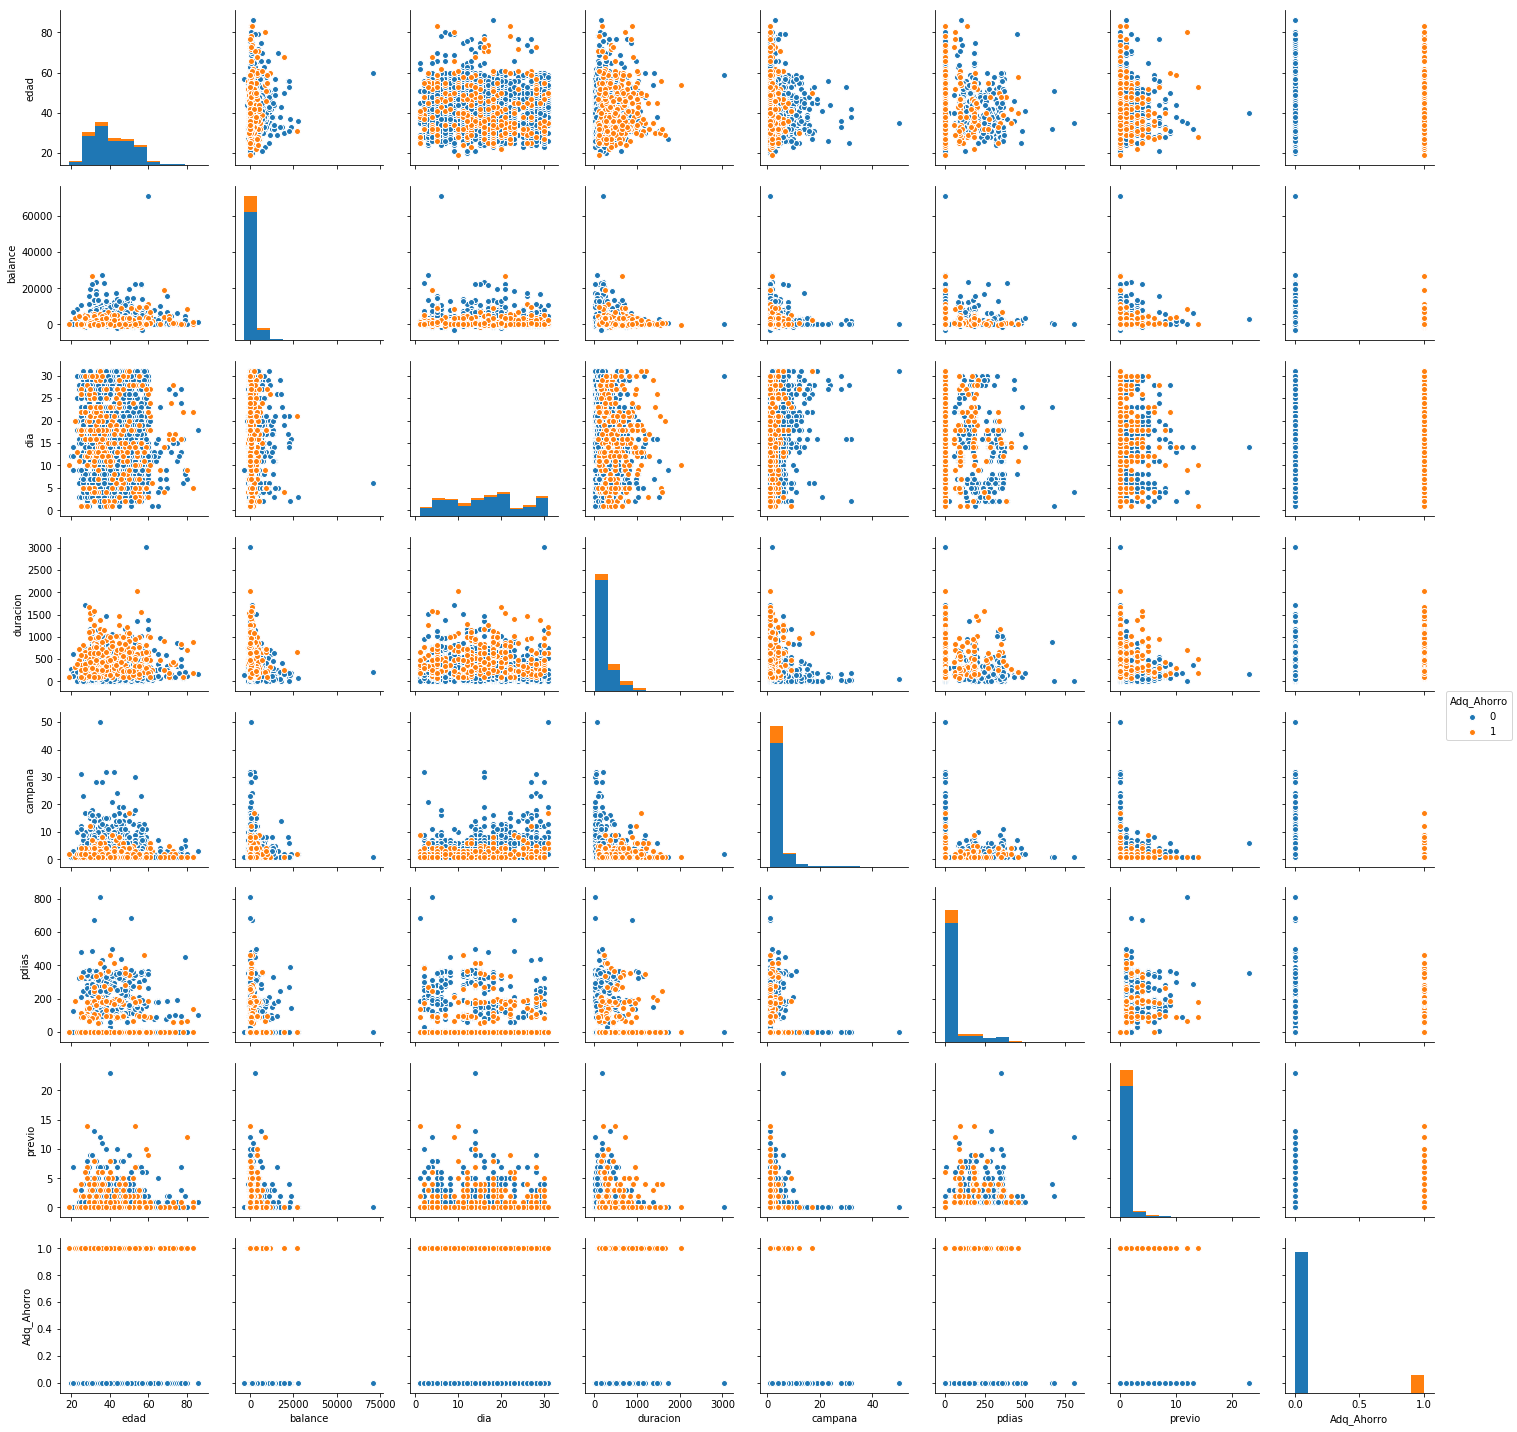

In [26]:
sns.pairplot(df_train[feature_columns['numerical']+[TARGET]], hue=TARGET);

<Figure size 720x1764 with 0 Axes>

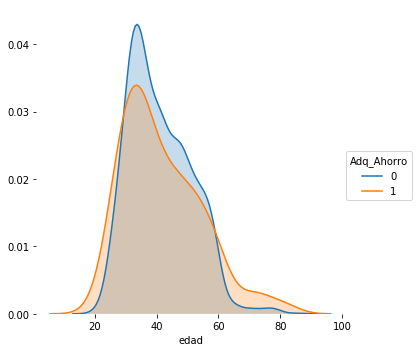

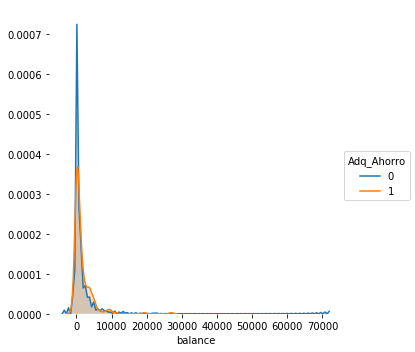

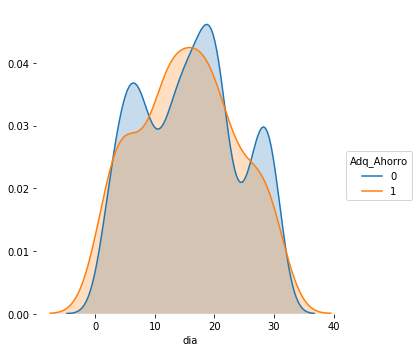

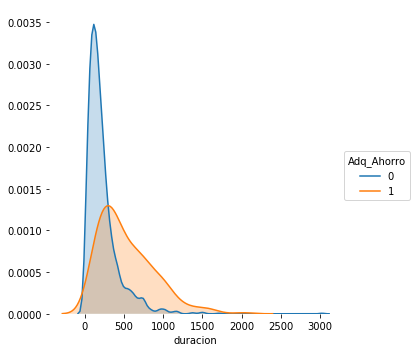

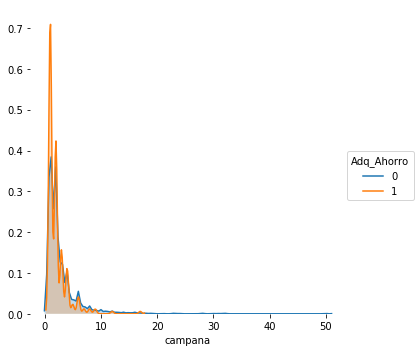

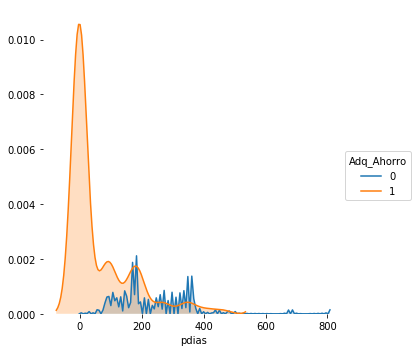

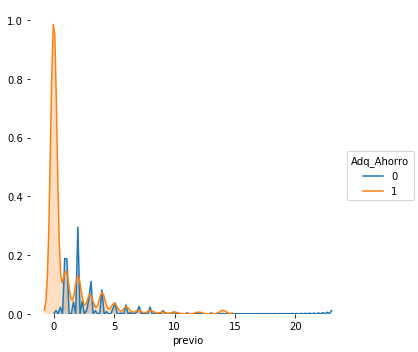

In [27]:
utils.graph_kdeplots(df_train, feature_columns['numerical'], TARGET)

## 2.3 Data Qality

### 2.3.a) Evaluate missings

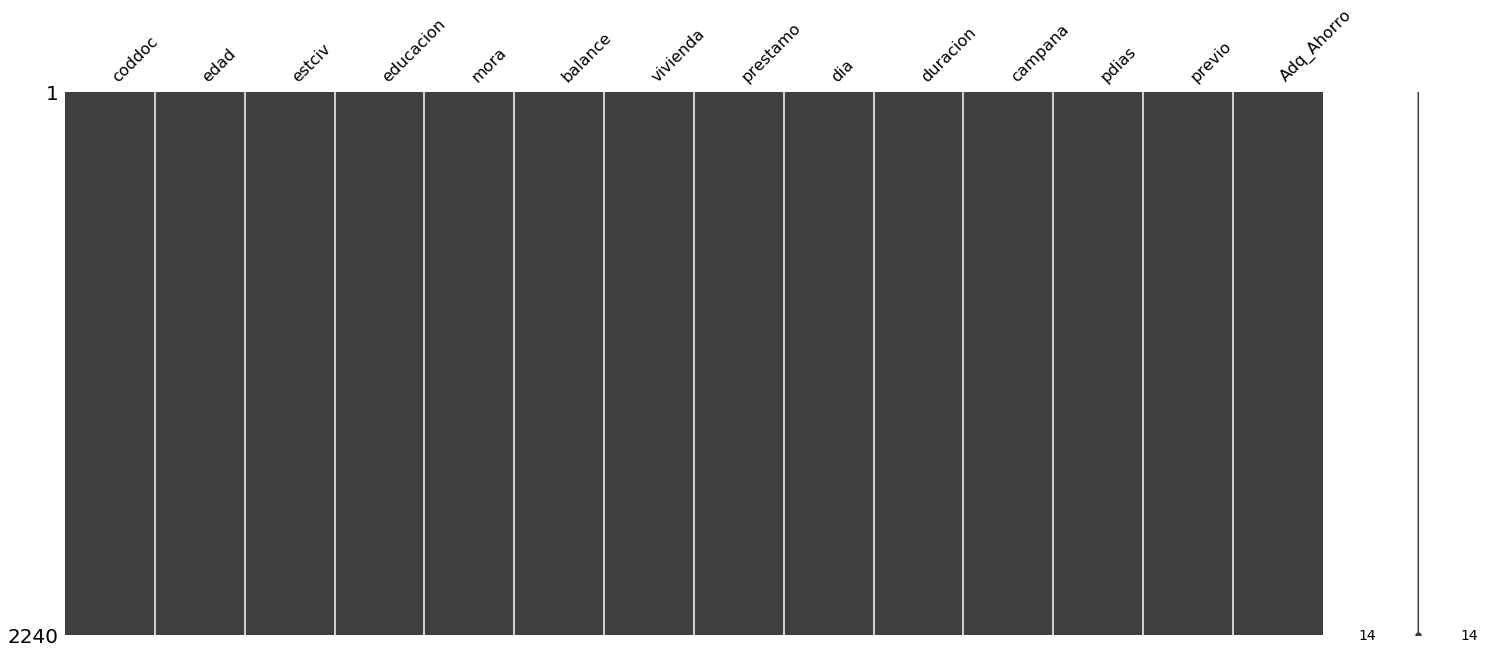

In [28]:
# Nulos
import missingno as msno
msno.matrix(df_train)

In [29]:
utils.fx_porc_missings(df_train)

,n_nulos,%Total
coddoc,0,0.0
edad,0,0.0
estciv,0,0.0
educacion,0,0.0
mora,0,0.0
balance,0,0.0
vivienda,0,0.0
prestamo,0,0.0
dia,0,0.0
duracion,0,0.0


In [30]:
utils.fx_porc_missings(df_test)

,n_nulos,%Total
coddoc,0,0.0
edad,0,0.0
estciv,0,0.0
educacion,0,0.0
mora,0,0.0
balance,0,0.0
vivienda,0,0.0
prestamo,0,0.0
dia,0,0.0
duracion,0,0.0


### 2.4.b) Outliers Detection

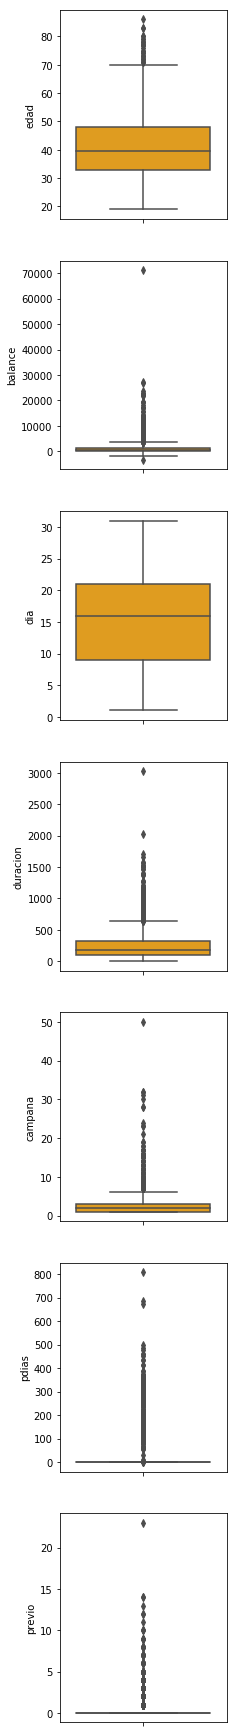

In [31]:
utils.graph_boxplots(base = df_train, vars_to_plot = feature_columns['numerical'])

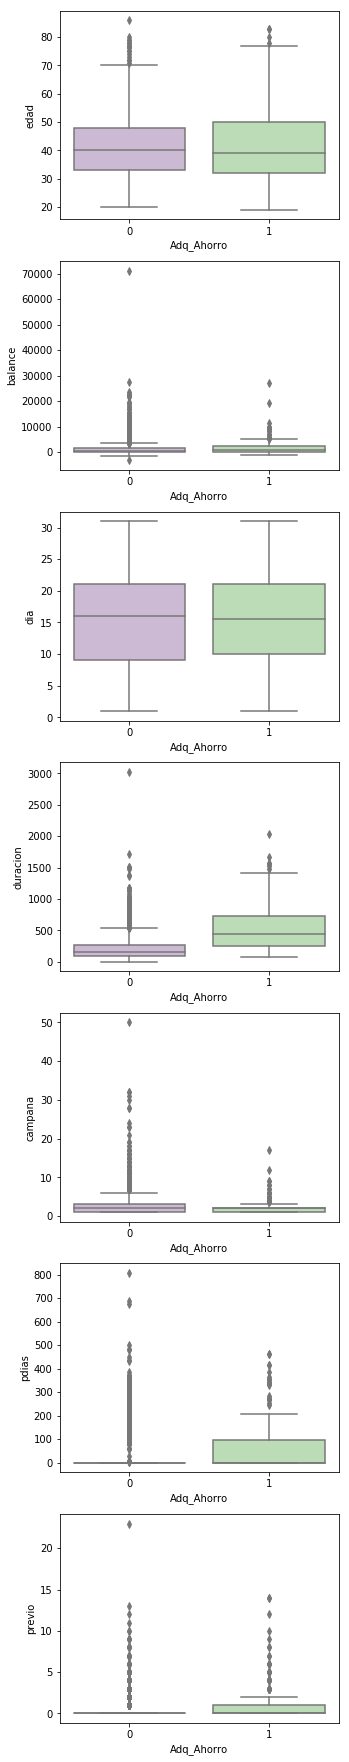

In [32]:
utils.graph_boxplots(base = df_train, vars_to_plot = feature_columns['numerical'], target = TARGET)

# ***3. Data Preparation***

In [33]:
df_train.head()

,coddoc,edad,estciv,educacion,mora,balance,vivienda,prestamo,dia,duracion,campana,pdias,previo,Adq_Ahorro
0,CODDOC0001,30,married,primaria,no,1787,no,no,19,79,1,-1,0,0
1,CODDOC0002,33,married,secundaria,no,4789,si,si,11,220,1,339,4,0
2,CODDOC0003,35,single,terciario,no,1350,si,no,16,185,1,330,1,0
3,CODDOC0004,30,married,terciario,no,1476,si,si,3,199,4,-1,0,0
4,CODDOC0006,35,single,terciario,no,747,no,no,23,141,2,176,3,0


In [34]:
df_test.head()

,coddoc,edad,estciv,educacion,mora,balance,vivienda,prestamo,dia,duracion,campana,pdias,previo
0,CODDOC0005,59,married,secundaria,no,0,si,no,5,226,1,-1,0
1,CODDOC0007,36,married,terciario,no,307,si,no,14,341,1,330,2
2,CODDOC0008,39,married,secundaria,no,147,si,no,6,151,2,-1,0
3,CODDOC0012,43,married,secundaria,no,264,si,no,17,113,2,-1,0
4,CODDOC0013,36,married,terciario,no,1109,no,no,13,328,2,-1,0


## 3.1) Feature Pre-selection

In [35]:
train_id = df_train[[ID,TARGET]]
train_id.head()

,coddoc,Adq_Ahorro
0,CODDOC0001,0
1,CODDOC0002,0
2,CODDOC0003,0
3,CODDOC0004,0
4,CODDOC0006,0


In [36]:
test_id = df_test[[ID]]
test_id[TARGET] = np.NaN
test_id.head()

,coddoc,Adq_Ahorro
0,CODDOC0005,NaN
1,CODDOC0007,NaN
2,CODDOC0008,NaN
3,CODDOC0012,NaN
4,CODDOC0013,NaN


In [37]:
ds_train = df_train.drop([ID], axis = 1)
ds_train.head()

,edad,estciv,educacion,mora,balance,vivienda,prestamo,dia,duracion,campana,pdias,previo,Adq_Ahorro
0,30,married,primaria,no,1787,no,no,19,79,1,-1,0,0
1,33,married,secundaria,no,4789,si,si,11,220,1,339,4,0
2,35,single,terciario,no,1350,si,no,16,185,1,330,1,0
3,30,married,terciario,no,1476,si,si,3,199,4,-1,0,0
4,35,single,terciario,no,747,no,no,23,141,2,176,3,0


In [38]:
ds_test = df_test.drop([ID], axis = 1)
ds_test.head()

,edad,estciv,educacion,mora,balance,vivienda,prestamo,dia,duracion,campana,pdias,previo
0,59,married,secundaria,no,0,si,no,5,226,1,-1,0
1,36,married,terciario,no,307,si,no,14,341,1,330,2
2,39,married,secundaria,no,147,si,no,6,151,2,-1,0
3,43,married,secundaria,no,264,si,no,17,113,2,-1,0
4,36,married,terciario,no,1109,no,no,13,328,2,-1,0


*** Drop Insignificant Feature ***

In [39]:
ds_train = ds_train.drop(['dia'], axis = 1)
ds_test = ds_test.drop(['dia'], axis = 1)

feature_columns['int'].remove('dia')
feature_columns['numerical'].remove('dia')

In [40]:
# Features Categories
feature_columns

{'categorical': ['estciv', 'educacion', 'mora', 'vivienda', 'prestamo'],
 'int': ['edad', 'balance', 'duracion', 'campana', 'pdias', 'previo'],
 'float': [],
 'numerical': ['edad', 'balance', 'duracion', 'campana', 'pdias', 'previo']}

In [41]:
feature_columns['categorical']

['estciv', 'educacion', 'mora', 'vivienda', 'prestamo']

In [42]:
feature_columns['dummy_categorical'] = ['mora', 'vivienda', 'prestamo']
feature_columns['cardinal_categorical'] = ['estciv']
feature_columns['ordinal_categorical'] = ['educacion']

In [43]:
feature_columns

{'categorical': ['estciv', 'educacion', 'mora', 'vivienda', 'prestamo'],
 'int': ['edad', 'balance', 'duracion', 'campana', 'pdias', 'previo'],
 'float': [],
 'numerical': ['edad', 'balance', 'duracion', 'campana', 'pdias', 'previo'],
 'dummy_categorical': ['mora', 'vivienda', 'prestamo'],
 'cardinal_categorical': ['estciv'],
 'ordinal_categorical': ['educacion']}

## 3.2) Data Cleaning

### a) Missings

There aren't missing values.

### b) Outliers

In [44]:
feature_columns['numerical']

['edad', 'balance', 'duracion', 'campana', 'pdias', 'previo']

In [45]:
ds_train[feature_columns['numerical']].head()

,edad,balance,duracion,campana,pdias,previo
0,30,1787,79,1,-1,0
1,33,4789,220,1,339,4
2,35,1350,185,1,330,1
3,30,1476,199,4,-1,0
4,35,747,141,2,176,3


Analizing percentiles for each feature:

In [46]:
for var in feature_columns['numerical']:
    print("Var:", var)
    display(utils.fx_percentiles_en_lista(ds_train[var]))

Var: edad


,Percentile,Valor
0,0.0,19.000
1,0.5,23.195
2,1.0,24.000
3,2.5,26.000
4,5.0,27.000
5,10.0,29.000
6,25.0,33.000
7,50.0,39.500
8,75.0,48.000
9,90.0,56.000


Var: balance


,Percentile,Valor
0,0.0,-3313.000
1,0.5,-969.415
2,1.0,-799.820
3,2.5,-411.125
4,5.0,-217.050
5,10.0,0.000
6,25.0,63.000
7,50.0,437.000
8,75.0,1503.750
9,90.0,3872.100


Var: duracion


,Percentile,Valor
0,0.0,4.000
1,0.5,8.000
2,1.0,10.000
3,2.5,18.975
4,5.0,30.000
5,10.0,56.000
6,25.0,103.000
7,50.0,182.000
8,75.0,319.250
9,90.0,574.000


Var: campana


,Percentile,Valor
0,0.0,1.0
1,0.5,1.0
2,1.0,1.0
3,2.5,1.0
4,5.0,1.0
5,10.0,1.0
6,25.0,1.0
7,50.0,2.0
8,75.0,3.0
9,90.0,6.0


Var: pdias


,Percentile,Valor
0,0.0,-1.000
1,0.5,-1.000
2,1.0,-1.000
3,2.5,-1.000
4,5.0,-1.000
5,10.0,-1.000
6,25.0,-1.000
7,50.0,-1.000
8,75.0,-1.000
9,90.0,179.100


Var: previo


,Percentile,Valor
0,0.0,0.0
1,0.5,0.0
2,1.0,0.0
3,2.5,0.0
4,5.0,0.0
5,10.0,0.0
6,25.0,0.0
7,50.0,0.0
8,75.0,0.0
9,90.0,2.0


In [47]:
# ['balance', 'duracion', 'campana', 'pdias', 'previo']
dicc_top_perc = {'balance': 0.975, 'duracion':0.95,  'campana':0.95, 'pdias':0.995, 'previo':0.975}
dicc_bottom_perc = {'balance': 0.01}

In [48]:
dicc_maxlim_values = utils.fx_fit_apply_maxlim(ds_train , 
                                         list_vars = ['balance', 'duracion', 'campana', 'pdias', 'previo'], 
                                         dicc_top_perc = dicc_top_perc)

print(dicc_maxlim_values)

utils.fx_apply_maxlim(ds_test , list_vars = ['balance', 'duracion', 'campana', 'pdias', 'previo'], 
                dicc_maxlim_values = dicc_maxlim_values)

{'balance': 9269.900000000003, 'duracion': 754.0499999999997, 'campana': 8.0, 'pdias': 415.0, 'previo': 5.0}


In [49]:
dicc_minlim_values = utils.fx_fit_apply_minlim(ds_train , 
                                         list_vars = ['balance'], 
                                         dicc_bottom_perc = dicc_bottom_perc)

print(dicc_minlim_values)

utils.fx_apply_minlim(ds_test , list_vars = ['balance'], dicc_minlim_values = dicc_minlim_values)

{'balance': -799.8199999999999}


In [50]:
# Review:

for var in feature_columns['numerical']:
    print("Var:", var)
    display(utils.fx_percentiles_en_lista(ds_train[var]))

Var: edad


,Percentile,Valor
0,0.0,19.000
1,0.5,23.195
2,1.0,24.000
3,2.5,26.000
4,5.0,27.000
5,10.0,29.000
6,25.0,33.000
7,50.0,39.500
8,75.0,48.000
9,90.0,56.000


Var: balance


,Percentile,Valor
0,0.0,-799.8200
1,0.5,-799.8200
2,1.0,-785.0702
3,2.5,-411.1250
4,5.0,-217.0500
5,10.0,0.0000
6,25.0,63.0000
7,50.0,437.0000
8,75.0,1503.7500
9,90.0,3872.1000


Var: duracion


,Percentile,Valor
0,0.0,4.0000
1,0.5,8.0000
2,1.0,10.0000
3,2.5,18.9750
4,5.0,30.0000
5,10.0,56.0000
6,25.0,103.0000
7,50.0,182.0000
8,75.0,319.2500
9,90.0,574.0000


Var: campana


,Percentile,Valor
0,0.0,1.0
1,0.5,1.0
2,1.0,1.0
3,2.5,1.0
4,5.0,1.0
5,10.0,1.0
6,25.0,1.0
7,50.0,2.0
8,75.0,3.0
9,90.0,6.0


Var: pdias


,Percentile,Valor
0,0.0,-1.000
1,0.5,-1.000
2,1.0,-1.000
3,2.5,-1.000
4,5.0,-1.000
5,10.0,-1.000
6,25.0,-1.000
7,50.0,-1.000
8,75.0,-1.000
9,90.0,179.100


Var: previo


,Percentile,Valor
0,0.0,0.0
1,0.5,0.0
2,1.0,0.0
3,2.5,0.0
4,5.0,0.0
5,10.0,0.0
6,25.0,0.0
7,50.0,0.0
8,75.0,0.0
9,90.0,2.0


In [51]:
for var in feature_columns['numerical']:
    print("Var:", var)
    display(utils.fx_percentiles_en_lista(ds_test[var]))

Var: edad


,Percentile,Valor
0,0.0,19.0
1,0.5,22.0
2,1.0,23.0
3,2.5,25.0
4,5.0,27.0
5,10.0,29.0
6,25.0,33.0
7,50.0,39.0
8,75.0,49.0
9,90.0,56.0


Var: balance


,Percentile,Valor
0,0.0,-799.82
1,0.5,-727.00
2,1.0,-614.60
3,2.5,-365.00
4,5.0,-102.00
5,10.0,0.00
6,25.0,81.00
7,50.0,454.00
8,75.0,1449.00
9,90.0,3935.00


Var: duracion


,Percentile,Valor
0,0.0,5.00
1,0.5,8.40
2,1.0,11.80
3,2.5,19.00
4,5.0,31.00
5,10.0,59.00
6,25.0,106.00
7,50.0,188.00
8,75.0,338.00
9,90.0,582.00


Var: campana


,Percentile,Valor
0,0.0,1.0
1,0.5,1.0
2,1.0,1.0
3,2.5,1.0
4,5.0,1.0
5,10.0,1.0
6,25.0,1.0
7,50.0,2.0
8,75.0,3.0
9,90.0,5.0


Var: pdias


,Percentile,Valor
0,0.0,-1.0
1,0.5,-1.0
2,1.0,-1.0
3,2.5,-1.0
4,5.0,-1.0
5,10.0,-1.0
6,25.0,-1.0
7,50.0,-1.0
8,75.0,-1.0
9,90.0,189.0


Var: previo


,Percentile,Valor
0,0.0,0.0
1,0.5,0.0
2,1.0,0.0
3,2.5,0.0
4,5.0,0.0
5,10.0,0.0
6,25.0,0.0
7,50.0,0.0
8,75.0,0.0
9,90.0,2.0


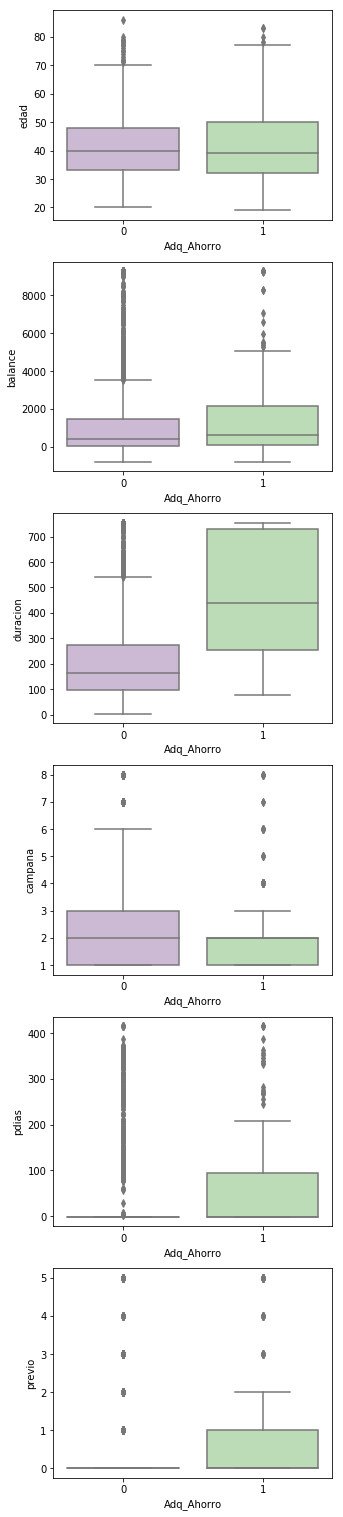

In [52]:
utils.graph_boxplots(base = ds_train, vars_to_plot = feature_columns['numerical'], target= TARGET )

## 3.3) Data Transformation

****Dummy Features****

In [53]:
feature_columns['dummy_categorical']

['mora', 'vivienda', 'prestamo']

In [54]:
from sklearn.preprocessing import LabelEncoder

list_le = []

# Fit 
for var in feature_columns['dummy_categorical']:
    le = LabelEncoder()
    le.fit(ds_train[[var]])
    list_le.append(le)

In [55]:
for var, le in zip(feature_columns['dummy_categorical'], list_le):
    ds_train[var] = le.transform(ds_train[var])

In [56]:
for var, le in zip(feature_columns['dummy_categorical'], list_le):
    ds_test[var] = le.transform(ds_test[[var]])

In [57]:
ds_train.head()

,edad,estciv,educacion,mora,balance,vivienda,prestamo,duracion,campana,pdias,previo,Adq_Ahorro
0,30,married,primaria,0,1787.0,0,0,79.0,1.0,-1.0,0.0,0
1,33,married,secundaria,0,4789.0,1,1,220.0,1.0,339.0,4.0,0
2,35,single,terciario,0,1350.0,1,0,185.0,1.0,330.0,1.0,0
3,30,married,terciario,0,1476.0,1,1,199.0,4.0,-1.0,0.0,0
4,35,single,terciario,0,747.0,0,0,141.0,2.0,176.0,3.0,0


In [58]:
ds_test.head()

,edad,estciv,educacion,mora,balance,vivienda,prestamo,duracion,campana,pdias,previo
0,59,married,secundaria,0,0.0,1,0,226.0,1.0,-1.0,0.0
1,36,married,terciario,0,307.0,1,0,341.0,1.0,330.0,2.0
2,39,married,secundaria,0,147.0,1,0,151.0,2.0,-1.0,0.0
3,43,married,secundaria,0,264.0,1,0,113.0,2.0,-1.0,0.0
4,36,married,terciario,0,1109.0,0,0,328.0,2.0,-1.0,0.0


****Cardinal Categorical Features****

In [59]:
feature_columns['cardinal_categorical']

['estciv']

In [60]:
ds_train = pd.get_dummies(data = ds_train, columns = feature_columns['cardinal_categorical'])

In [61]:
ds_test = pd.get_dummies(data = ds_test, columns = feature_columns['cardinal_categorical'])

In [62]:
ds_train.head()

,edad,educacion,mora,balance,vivienda,prestamo,duracion,campana,pdias,previo,Adq_Ahorro,estciv_divorced,estciv_married,estciv_single
0,30,primaria,0,1787.0,0,0,79.0,1.0,-1.0,0.0,0,0,1,0
1,33,secundaria,0,4789.0,1,1,220.0,1.0,339.0,4.0,0,0,1,0
2,35,terciario,0,1350.0,1,0,185.0,1.0,330.0,1.0,0,0,0,1
3,30,terciario,0,1476.0,1,1,199.0,4.0,-1.0,0.0,0,0,1,0
4,35,terciario,0,747.0,0,0,141.0,2.0,176.0,3.0,0,0,0,1


In [63]:
ds_test.head()

,edad,educacion,mora,balance,vivienda,prestamo,duracion,campana,pdias,previo,estciv_divorced,estciv_married,estciv_single
0,59,secundaria,0,0.0,1,0,226.0,1.0,-1.0,0.0,0,1,0
1,36,terciario,0,307.0,1,0,341.0,1.0,330.0,2.0,0,1,0
2,39,secundaria,0,147.0,1,0,151.0,2.0,-1.0,0.0,0,1,0
3,43,secundaria,0,264.0,1,0,113.0,2.0,-1.0,0.0,0,1,0
4,36,terciario,0,1109.0,0,0,328.0,2.0,-1.0,0.0,0,1,0


****Ordinal Categorical Features****

In [64]:
feature_columns['ordinal_categorical']

['educacion']

In [65]:
# Create values diccionary for each feature:
dicc_educacion = {'desconocido': 1, 'primaria': 2, 'secundaria':3, 'terciario':4 }

list_dicc_features = { 'educacion': dicc_educacion }

In [66]:
# Map on Training DS
for var in feature_columns['ordinal_categorical']:
    ds_train[var] = ds_train[var].map(list_dicc_features[var])

In [67]:
# Map on Testing DS
for var in feature_columns['ordinal_categorical']:
    ds_test[var] = ds_test[var].map(list_dicc_features[var])

In [68]:
ds_train.head()

,edad,educacion,mora,balance,vivienda,prestamo,duracion,campana,pdias,previo,Adq_Ahorro,estciv_divorced,estciv_married,estciv_single
0,30,2,0,1787.0,0,0,79.0,1.0,-1.0,0.0,0,0,1,0
1,33,3,0,4789.0,1,1,220.0,1.0,339.0,4.0,0,0,1,0
2,35,4,0,1350.0,1,0,185.0,1.0,330.0,1.0,0,0,0,1
3,30,4,0,1476.0,1,1,199.0,4.0,-1.0,0.0,0,0,1,0
4,35,4,0,747.0,0,0,141.0,2.0,176.0,3.0,0,0,0,1


In [69]:
ds_test.head()

,edad,educacion,mora,balance,vivienda,prestamo,duracion,campana,pdias,previo,estciv_divorced,estciv_married,estciv_single
0,59,3,0,0.0,1,0,226.0,1.0,-1.0,0.0,0,1,0
1,36,4,0,307.0,1,0,341.0,1.0,330.0,2.0,0,1,0
2,39,3,0,147.0,1,0,151.0,2.0,-1.0,0.0,0,1,0
3,43,3,0,264.0,1,0,113.0,2.0,-1.0,0.0,0,1,0
4,36,4,0,1109.0,0,0,328.0,2.0,-1.0,0.0,0,1,0


## 3.4) FEATURE ENGINEERING

In [70]:
ds_train.head()

,edad,educacion,mora,balance,vivienda,prestamo,duracion,campana,pdias,previo,Adq_Ahorro,estciv_divorced,estciv_married,estciv_single
0,30,2,0,1787.0,0,0,79.0,1.0,-1.0,0.0,0,0,1,0
1,33,3,0,4789.0,1,1,220.0,1.0,339.0,4.0,0,0,1,0
2,35,4,0,1350.0,1,0,185.0,1.0,330.0,1.0,0,0,0,1
3,30,4,0,1476.0,1,1,199.0,4.0,-1.0,0.0,0,0,1,0
4,35,4,0,747.0,0,0,141.0,2.0,176.0,3.0,0,0,0,1


In [71]:
ds_test.head()

,edad,educacion,mora,balance,vivienda,prestamo,duracion,campana,pdias,previo,estciv_divorced,estciv_married,estciv_single
0,59,3,0,0.0,1,0,226.0,1.0,-1.0,0.0,0,1,0
1,36,4,0,307.0,1,0,341.0,1.0,330.0,2.0,0,1,0
2,39,3,0,147.0,1,0,151.0,2.0,-1.0,0.0,0,1,0
3,43,3,0,264.0,1,0,113.0,2.0,-1.0,0.0,0,1,0
4,36,4,0,1109.0,0,0,328.0,2.0,-1.0,0.0,0,1,0


In [72]:
utils.resumen_numerical_cols(ds_train, feature_columns['numerical'], TARGET)

edad :

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
Adq_Ahorro,,,,,,,,,,,,
0,1982.0,41.148840,10.171153,20.0,25.00,27.00,33.0,40.0,48.0,58.0,69.19,86.0
1,258.0,41.837209,12.805210,19.0,23.57,25.85,32.0,39.0,50.0,66.3,78.86,83.0


balance :

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
Adq_Ahorro,,,,,,,,,,,,
0,1982.0,1247.604652,2084.561917,-799.82,-759.57,-195.9,61.00,424.0,1449.5,6263.75,9269.9,9269.9
1,258.0,1484.950078,2122.092026,-799.82,-799.82,-308.0,100.75,648.5,2176.5,5469.80,9269.9,9269.9


duracion :

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
Adq_Ahorro,,,,,,,,,,,,
0,1982.0,215.588547,173.790260,4.0,10.00,29.0,96.00,165.0,274.75,622.00,754.05,754.05
1,258.0,461.756202,230.674794,78.0,92.14,105.7,254.75,438.5,731.50,754.05,754.05,754.05


campana :

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
Adq_Ahorro,,,,,,,,,,,,
0,1982.0,2.622099,2.017584,1.0,1.0,1.0,1.0,2.0,3.0,8.0,8.0,8.0
1,258.0,2.104651,1.573336,1.0,1.0,1.0,1.0,2.0,2.0,6.0,8.0,8.0


pdias :

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
Adq_Ahorro,,,,,,,,,,,,
0,1982.0,34.027750,90.210756,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00,279.75,364.19,415.0
1,258.0,58.945736,101.251454,-1.0,-1.0,-1.0,-1.0,-1.0,94.75,276.05,415.00,415.0


previo :

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
Adq_Ahorro,,,,,,,,,,,,
0,1982.0,0.381937,1.057621,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,5.0
1,258.0,0.949612,1.585863,0.0,0.0,0.0,0.0,0.0,1.0,5.0,5.0,5.0


In [73]:
feature_columns

{'categorical': ['estciv', 'educacion', 'mora', 'vivienda', 'prestamo'],
 'int': ['edad', 'balance', 'duracion', 'campana', 'pdias', 'previo'],
 'float': [],
 'numerical': ['edad', 'balance', 'duracion', 'campana', 'pdias', 'previo'],
 'dummy_categorical': ['mora', 'vivienda', 'prestamo'],
 'cardinal_categorical': ['estciv'],
 'ordinal_categorical': ['educacion']}

In [74]:
def fx_concat_features(data, var_1, var_2 ):
    data[var_1+"_"+var_2] = data[[var_1,var_2]].apply(lambda x: str(x[0]) + str(x[1]), axis = 1 )

In [75]:
def fx_preprocessing_01(data):
    # Var: pdias
    data['pdias'] = np.where(data['pdias'] == -1, 0, data['pdias'])
    data['ptrim'] = round(data['pdias']/91)
    data['ptrim'] = np.where(data['ptrim'] == 0, 5, data['ptrim'])
    
    # Var: duracion
    data['log_duracion'] = np.log1p(data['duracion'])
    data['duracion_2minutes'] = round(data['duracion']/120)
    
    # Var: previo
    data['cat_previo'] = np.where(data['previo'] >= 3, 3, data['previo'])
    data['log_previo'] = np.log1p(data['previo'])
    
    # Var: balance
    data['cat_balance'] = np.where(data['balance'] >= 3, 3, data['balance'])
    data['log_balance'] = np.log1p(np.where(data['balance'] < 0 , 0 , data['balance']) )
    
    # Concat vivienda + prestamo
    fx_concat_features(data, 'vivienda', 'prestamo')

In [76]:
fx_preprocessing_01(ds_train)

In [77]:
fx_preprocessing_01(ds_test)

In [78]:
ds_train.head()

,edad,educacion,mora,balance,vivienda,prestamo,duracion,campana,pdias,previo,...,estciv_married,estciv_single,ptrim,log_duracion,duracion_2minutes,cat_previo,log_previo,cat_balance,log_balance,vivienda_prestamo
0,30,2,0,1787.0,0,0,79.0,1.0,0.0,0.0,...,1,0,5.0,4.382027,1.0,0.0,0.000000,3.0,7.488853,00
1,33,3,0,4789.0,1,1,220.0,1.0,339.0,4.0,...,1,0,4.0,5.398163,2.0,3.0,1.609438,3.0,8.474286,11
2,35,4,0,1350.0,1,0,185.0,1.0,330.0,1.0,...,0,1,4.0,5.225747,2.0,1.0,0.693147,3.0,7.208600,10
3,30,4,0,1476.0,1,1,199.0,4.0,0.0,0.0,...,1,0,5.0,5.298317,2.0,0.0,0.000000,3.0,7.297768,11
4,35,4,0,747.0,0,0,141.0,2.0,176.0,3.0,...,0,1,2.0,4.955827,1.0,3.0,1.386294,3.0,6.617403,00


In [79]:
ds_test.head()

,edad,educacion,mora,balance,vivienda,prestamo,duracion,campana,pdias,previo,...,estciv_married,estciv_single,ptrim,log_duracion,duracion_2minutes,cat_previo,log_previo,cat_balance,log_balance,vivienda_prestamo
0,59,3,0,0.0,1,0,226.0,1.0,0.0,0.0,...,1,0,5.0,5.424950,2.0,0.0,0.000000,0.0,0.000000,10
1,36,4,0,307.0,1,0,341.0,1.0,330.0,2.0,...,1,0,4.0,5.834811,3.0,2.0,1.098612,3.0,5.730100,10
2,39,3,0,147.0,1,0,151.0,2.0,0.0,0.0,...,1,0,5.0,5.023881,1.0,0.0,0.000000,3.0,4.997212,10
3,43,3,0,264.0,1,0,113.0,2.0,0.0,0.0,...,1,0,5.0,4.736198,1.0,0.0,0.000000,3.0,5.579730,10
4,36,4,0,1109.0,0,0,328.0,2.0,0.0,0.0,...,1,0,5.0,5.796058,3.0,0.0,0.000000,3.0,7.012115,00


#### Apply TARGET ENCODING

In [80]:
#Var: vivienda_prestamo

In [81]:
dicc_targenc_tmp = utils.fx_target_encoder_fit_apply(ds_train, 'vivienda_prestamo', TARGET)

In [82]:
utils.fx_target_encoder_apply(ds_test, 'vivienda_prestamo', dicc_targenc_tmp)

In [83]:
ds_train.head()

,edad,educacion,mora,balance,vivienda,prestamo,duracion,campana,pdias,previo,...,estciv_single,ptrim,log_duracion,duracion_2minutes,cat_previo,log_previo,cat_balance,log_balance,vivienda_prestamo,vivienda_prestamo_target_enc
0,30,2,0,1787.0,0,0,79.0,1.0,0.0,0.0,...,0,5.0,4.382027,1.0,0.0,0.000000,3.0,7.488853,00,0.169719
1,33,3,0,4789.0,1,1,220.0,1.0,339.0,4.0,...,0,4.0,5.398163,2.0,3.0,1.609438,3.0,8.474286,11,0.043689
2,35,4,0,1350.0,1,0,185.0,1.0,330.0,1.0,...,1,4.0,5.225747,2.0,1.0,0.693147,3.0,7.208600,10,0.091667
3,30,4,0,1476.0,1,1,199.0,4.0,0.0,0.0,...,0,5.0,5.298317,2.0,0.0,0.000000,3.0,7.297768,11,0.043689
4,35,4,0,747.0,0,0,141.0,2.0,176.0,3.0,...,1,2.0,4.955827,1.0,3.0,1.386294,3.0,6.617403,00,0.169719


In [84]:
ds_test.head()

,edad,educacion,mora,balance,vivienda,prestamo,duracion,campana,pdias,previo,...,estciv_single,ptrim,log_duracion,duracion_2minutes,cat_previo,log_previo,cat_balance,log_balance,vivienda_prestamo,vivienda_prestamo_target_enc
0,59,3,0,0.0,1,0,226.0,1.0,0.0,0.0,...,0,5.0,5.424950,2.0,0.0,0.000000,0.0,0.000000,10,0.091667
1,36,4,0,307.0,1,0,341.0,1.0,330.0,2.0,...,0,4.0,5.834811,3.0,2.0,1.098612,3.0,5.730100,10,0.091667
2,39,3,0,147.0,1,0,151.0,2.0,0.0,0.0,...,0,5.0,5.023881,1.0,0.0,0.000000,3.0,4.997212,10,0.091667
3,43,3,0,264.0,1,0,113.0,2.0,0.0,0.0,...,0,5.0,4.736198,1.0,0.0,0.000000,3.0,5.579730,10,0.091667
4,36,4,0,1109.0,0,0,328.0,2.0,0.0,0.0,...,0,5.0,5.796058,3.0,0.0,0.000000,3.0,7.012115,00,0.169719


In [85]:
del ds_train['vivienda_prestamo']

In [86]:
del ds_test['vivienda_prestamo']

In [87]:
# Validate Target Encoding
utils.cross_target(base=ds_train, var='vivienda_prestamo_target_enc',target = TARGET)

----------------------------------------------------------------
---- Var:  vivienda_prestamo_target_enc
   Atributo  Cantidad     %Total
0  0.091667      1080  48.214286
1  0.169719       819  36.562500
2  0.043689       206   9.196429
3  0.081481       135   6.026786

   vivienda_prestamo_target_enc  % ratio_conv
3                      0.169719     16.971917
2                      0.091667      9.166667
1                      0.081481      8.148148
0                      0.043689      4.368932


In [88]:
# Target Encoding on dummy_categorical and ordinal_categorical Features 

In [89]:
vars_to_tenc = feature_columns['dummy_categorical'] + feature_columns['ordinal_categorical'] 
vars_to_tenc

['mora', 'vivienda', 'prestamo', 'educacion']

In [90]:
for var in vars_to_tenc:
    dicc_targenc_tmp = utils.fx_target_encoder_fit_apply(ds_train, var, TARGET)
    utils.fx_target_encoder_apply(ds_test, var, dicc_targenc_tmp)

In [91]:
ds_train.head()

,edad,educacion,mora,balance,vivienda,prestamo,duracion,campana,pdias,previo,...,duracion_2minutes,cat_previo,log_previo,cat_balance,log_balance,vivienda_prestamo_target_enc,mora_target_enc,vivienda_target_enc,prestamo_target_enc,educacion_target_enc
0,30,2,0,1787.0,0,0,79.0,1.0,0.0,0.0,...,1.0,0.0,0.000000,3.0,7.488853,0.169719,0.114182,0.157233,0.125329,0.099398
1,33,3,0,4789.0,1,1,220.0,1.0,339.0,4.0,...,2.0,3.0,1.609438,3.0,8.474286,0.043689,0.114182,0.083981,0.058651,0.103175
2,35,4,0,1350.0,1,0,185.0,1.0,330.0,1.0,...,2.0,1.0,0.693147,3.0,7.208600,0.091667,0.114182,0.083981,0.125329,0.146487
3,30,4,0,1476.0,1,1,199.0,4.0,0.0,0.0,...,2.0,0.0,0.000000,3.0,7.297768,0.043689,0.114182,0.083981,0.058651,0.146487
4,35,4,0,747.0,0,0,141.0,2.0,176.0,3.0,...,1.0,3.0,1.386294,3.0,6.617403,0.169719,0.114182,0.157233,0.125329,0.146487


## 3.5) Feature Selection

In [92]:
features_to_model = list(ds_train.columns)
features_to_model.remove('Adq_Ahorro')
list(features_to_model)

['edad',
 'educacion',
 'mora',
 'balance',
 'vivienda',
 'prestamo',
 'duracion',
 'campana',
 'pdias',
 'previo',
 'estciv_divorced',
 'estciv_married',
 'estciv_single',
 'ptrim',
 'log_duracion',
 'duracion_2minutes',
 'cat_previo',
 'log_previo',
 'cat_balance',
 'log_balance',
 'vivienda_prestamo_target_enc',
 'mora_target_enc',
 'vivienda_target_enc',
 'prestamo_target_enc',
 'educacion_target_enc']

***Select Final Features:***

In [93]:
features_to_model = ['duracion',
 #'log_duracion',
 #'duracion_2minutes',
 'edad',
 'balance',
 'pdias',
 #'log_balance',
 'vivienda_prestamo_target_enc',
 'ptrim',
 'log_previo',
 #'previo',
 #'cat_previo',
 'campana',
 'vivienda_target_enc',
 #'vivienda',
 'educacion_target_enc',
 'estciv_married',
 #'educacion',
 #'cat_balance',
 'prestamo_target_enc',
 'estciv_divorced',
 'estciv_single',
 'prestamo',
 'mora_target_enc']
 #'mora']

In [94]:
len(features_to_model)

16

In [95]:
#características y target
X = ds_train[features_to_model]
y = train_id[TARGET]

X_summit = ds_test[features_to_model]

In [96]:
print("train: ", X.shape,", summit: ", X_summit.shape)

train:  (2240, 16) , summit:  (2281, 16)


### Standardize Datasets

In [97]:
### Standardize Datasets
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(X)
X_summit_scaler = scaler.transform(X_summit)

X_scaler = pd.DataFrame(X_scaler, columns=X.columns)
X_summit_scaler = pd.DataFrame(X_summit_scaler, columns=X_summit.columns)

In [98]:
X.head()

,duracion,edad,balance,pdias,vivienda_prestamo_target_enc,ptrim,log_previo,campana,vivienda_target_enc,educacion_target_enc,estciv_married,prestamo_target_enc,estciv_divorced,estciv_single,prestamo,mora_target_enc
0,79.0,30,1787.0,0.0,0.169719,5.0,0.000000,1.0,0.157233,0.099398,1,0.125329,0,0,0,0.114182
1,220.0,33,4789.0,339.0,0.043689,4.0,1.609438,1.0,0.083981,0.103175,1,0.058651,0,0,1,0.114182
2,185.0,35,1350.0,330.0,0.091667,4.0,0.693147,1.0,0.083981,0.146487,0,0.125329,0,1,0,0.114182
3,199.0,30,1476.0,0.0,0.043689,5.0,0.000000,4.0,0.083981,0.146487,1,0.058651,0,0,1,0.114182
4,141.0,35,747.0,176.0,0.169719,2.0,1.386294,2.0,0.157233,0.146487,0,0.125329,0,1,0,0.114182


In [99]:
X_scaler.head()

,duracion,edad,balance,pdias,vivienda_prestamo_target_enc,ptrim,log_previo,campana,vivienda_target_enc,educacion_target_enc,estciv_married,prestamo_target_enc,estciv_divorced,estciv_single,prestamo,mora_target_enc
0,0.099993,0.164179,0.256891,0.000000,1.000000,1.00,0.000000,0.000000,1.0,0.081162,1.0,1.0,0.0,0.0,0.0,0.0
1,0.287981,0.208955,0.555012,0.816867,0.000000,0.75,0.898244,0.000000,0.0,0.154861,1.0,0.0,0.0,0.0,1.0,0.0
2,0.241317,0.238806,0.213494,0.795181,0.380682,0.75,0.386853,0.000000,0.0,1.000000,0.0,1.0,0.0,1.0,0.0,0.0
3,0.259983,0.164179,0.226006,0.000000,0.000000,1.00,0.000000,0.428571,0.0,1.000000,1.0,0.0,0.0,0.0,1.0,0.0
4,0.182654,0.238806,0.153611,0.424096,1.000000,0.25,0.773706,0.142857,1.0,1.000000,0.0,1.0,0.0,1.0,0.0,0.0


In [100]:
X_scaler.describe().T

,count,mean,std,min,25%,50%,75%,max
duracion,2240.0,0.319901,0.263325,0.0,0.131991,0.237318,0.420305,1.0
edad,2240.0,0.331763,0.156824,0.0,0.208955,0.305970,0.432836,1.0
balance,2240.0,0.206040,0.207534,0.0,0.085685,0.122826,0.228762,1.0
pdias,2240.0,0.090889,0.220560,0.0,0.000000,0.000000,0.000000,1.0
vivienda_prestamo_target_enc,2240.0,0.567241,0.345264,0.0,0.380682,0.380682,1.000000,1.0
ptrim,2240.0,0.886384,0.274500,0.0,1.000000,1.000000,1.000000,1.0
log_previo,2240.0,0.116351,0.268018,0.0,0.000000,0.000000,0.000000,1.0
campana,2240.0,0.223214,0.282591,0.0,0.000000,0.142857,0.285714,1.0
vivienda_target_enc,2240.0,0.425893,0.494588,0.0,0.000000,0.000000,1.000000,1.0
educacion_target_enc,2240.0,0.389089,0.400574,0.0,0.154861,0.154861,1.000000,1.0


In [101]:
X_summit_scaler.head()

,duracion,edad,balance,pdias,vivienda_prestamo_target_enc,ptrim,log_previo,campana,vivienda_target_enc,educacion_target_enc,estciv_married,prestamo_target_enc,estciv_divorced,estciv_single,prestamo,mora_target_enc
0,0.295980,0.597015,0.079428,0.000000,0.380682,1.00,0.000000,0.000000,0.0,0.154861,1.0,1.0,0.0,0.0,0.0,0.0
1,0.449303,0.253731,0.109916,0.795181,0.380682,0.75,0.613147,0.000000,0.0,1.000000,1.0,1.0,0.0,0.0,0.0,0.0
2,0.195987,0.298507,0.094026,0.000000,0.380682,1.00,0.000000,0.142857,0.0,0.154861,1.0,1.0,0.0,0.0,0.0,0.0
3,0.145324,0.358209,0.105645,0.000000,0.380682,1.00,0.000000,0.142857,0.0,0.154861,1.0,1.0,0.0,0.0,0.0,0.0
4,0.431971,0.253731,0.189560,0.000000,1.000000,1.00,0.000000,0.142857,1.0,1.000000,1.0,1.0,0.0,0.0,0.0,0.0


## 3.6) PCA

In [102]:
from sklearn.decomposition import PCA

n_components = 8

pca = PCA(n_components = n_components)
pca.fit(X)

print(pca.explained_variance_ratio_)

[9.89241207e-01 8.83699600e-03 1.89578476e-03 2.48198734e-05
 8.67444372e-07 1.78997008e-07 7.68103097e-08 3.23237182e-08]


In [103]:
sum_explained_variance = sum(pca.explained_variance_ratio_)
print("Explained Variance:",sum_explained_variance)

Explained Variance: 0.9999999634856299


In [104]:
X_pca = pca.transform(X)
X_pca = pd.DataFrame(X_pca, columns=["var_pca_" + str(i) for i in range(1,n_components+1)])
X_pca.head()

,var_pca_1,var_pca_2,var_pca_3,var_pca_4,var_pca_5,var_pca_6,var_pca_7,var_pca_8
0,511.998191,-165.460559,-36.162621,-11.416496,-1.779866,-0.296737,-0.659632,-0.027785
1,3514.354258,-20.564606,298.016104,-9.732263,-0.778558,-1.777225,-0.665853,0.453338
2,75.344664,-55.283872,292.920892,-6.213735,-0.868787,-1.697218,0.811833,-0.363884
3,201.010436,-45.438281,-37.359202,-11.300020,1.351205,-0.128772,-0.695081,0.471307
4,-527.814796,-101.141820,140.113697,-5.952974,-0.458179,1.711770,0.698856,-0.285649


In [105]:
X_summit_pca = pca.transform(X_summit)
X_summit_pca = pd.DataFrame(X_summit_pca, columns=["var_pca_" + str(i) for i in range(1,n_components+1)])
X_summit_pca.head()

,var_pca_1,var_pca_2,var_pca_3,var_pca_4,var_pca_5,var_pca_6,var_pca_7,var_pca_8
0,-1274.972926,-18.262023,-36.207784,18.339390,-1.704020,-0.275474,-0.119122,-0.287954
1,-967.638537,100.822145,292.019554,-4.756896,-0.688510,-1.631991,-0.559416,-0.122993
2,-1127.989524,-93.279090,-35.414453,-1.699574,-0.732843,-0.186342,-0.482524,-0.116283
3,-1010.991630,-131.288314,-35.057132,2.256757,-0.787021,-0.196737,-0.400592,-0.146049
4,-165.973647,83.597009,-38.602190,-5.175039,-0.518904,-0.229786,-0.568318,-0.084613


## 3.6) Train & Test Split

In [106]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_scaler, y, train_size = 0.70, random_state=99)#99
print((len(X_train), len(y_train)), (len(X_test), len(y_test)))

(1568, 1568) (672, 672)


In [107]:
X_train.head()

,duracion,edad,balance,pdias,vivienda_prestamo_target_enc,ptrim,log_previo,campana,vivienda_target_enc,educacion_target_enc,estciv_married,prestamo_target_enc,estciv_divorced,estciv_single,prestamo,mora_target_enc
1105,0.739951,0.223881,0.126599,0.000000,0.380682,1.00,0.000000,0.0,0.0,0.154861,1.0,1.0,0.0,0.0,0.0,0.0
1968,0.085328,0.358209,0.081812,0.874699,1.000000,0.75,0.386853,0.0,1.0,0.154861,0.0,1.0,0.0,1.0,0.0,0.0
1889,1.000000,0.313433,0.442696,0.000000,0.380682,1.00,0.000000,0.0,0.0,0.081162,1.0,1.0,0.0,0.0,0.0,0.0
237,0.198653,0.313433,0.970118,0.000000,0.380682,1.00,0.000000,0.0,0.0,1.000000,1.0,1.0,0.0,0.0,0.0,0.0
796,0.241317,0.462687,0.235540,0.000000,0.380682,1.00,0.000000,0.0,0.0,0.154861,1.0,1.0,0.0,0.0,0.0,0.0


# *** 4. Modeling & Evaluation - Simple ***

## 4.1.A LOGISTIC REGRESSION

In [108]:
from sklearn.linear_model import LogisticRegression
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [109]:
# Create  model objet 
model_rlog = LogisticRegression(C=5, max_iter= 500, random_state=0, n_jobs = 4, penalty = 'l1') # , class_weight='balanced'
#model_rlog = LogisticRegression(class_weight='balanced') # , class_weight='balanced'

# Fit the model:
model_rlog.fit(X_train, y_train)

model = model_rlog

In [110]:
df_weights = pd.DataFrame({'feature':X_train.columns.values, 'beta': np.round(model_rlog.coef_[0],4) })
df_weights.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
feature,duracion,edad,balance,pdias,vivienda_prestamo_target_enc,ptrim,log_previo,campana,vivienda_target_enc,educacion_target_enc,estciv_married,prestamo_target_enc,estciv_divorced,estciv_single,prestamo,mora_target_enc
beta,3.969,0.1662,0.4094,-0.4294,0.9618,-0.7161,1.2952,-0.6779,0.365,0.3837,-0.3987,0,0,-0.2695,-0.4423,1.1181


### Predict

In [111]:
# Generar las predicciones:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# Generar las probabilidades
pred_proba_train = model.predict_proba(X_train)[:,1]
pred_proba_test = model.predict_proba(X_test)[:,1]

### 4.1.2 Evaluación del Modelo

In [112]:
print(color.BOLD + "Metricas del Training..." + color.END + "\n")
utils.fx_evaluate_classif(y_train, pred_train, pred_proba_train)
print("\n" + color.BOLD + "Metricas del Testing..." + color.END + "\n")
utils.fx_evaluate_classif(y_test, pred_test, pred_proba_test)

Metricas del Training...

        Pred_0  Pred_1
Real_0    1351      32
Real_1     148      37

ROC:  0.8565671962635087
Accu: 0.8852040816326531

Metricas del Testing...

        Pred_0  Pred_1
Real_0     581      18
Real_1      49      24

ROC:  0.8811032085439203
Accu: 0.9002976190476191


***Metric of Challenge:***

In this case (challenge), the metric is ROC curve with predictions 0s and 1s :

In [113]:
from sklearn import metrics as mt

In [114]:
roc_0_1_train = mt.roc_auc_score(y_train, pred_train) # y_train are 0s,1s AND pred_train are 0s,1s 
roc_0_1_test = mt.roc_auc_score(y_test, pred_test) # y_test are 0s,1s AND pred_test are 0s,1s 

In [115]:
print("Challenge ROC - Train:", roc_0_1_train) 
print("Challenge ROC - Test: ", roc_0_1_test) 

Challenge ROC - Train: 0.5884309472161967
Challenge ROC - Test:  0.6493585199076086


***COMMENT:*** The threshold used is 0.5: if prob > 0.5 then 1 else 0.
In the next step, we'll find the best threshold for the challenge metric on training data. (It was more stable on the leaderboard).

### ****Find best threshold:****

In [116]:
best_thres = utils.fx_find_best_threshold(y_train, pred_proba_train)

Best ROC:  0.7747063766586543
Threshold: 0.15


best_thres = utils.fx_find_best_threshold(y_test, pred_proba_test)

In [117]:
roc_0_1_train = mt.roc_auc_score(y_train, utils.fx_predict(pred_proba_train, best_thres))
roc_0_1_test = mt.roc_auc_score(y_test, utils.fx_predict(pred_proba_test, best_thres))

In [118]:
print("Challenge ROC - Train:", roc_0_1_train) 
print("Challenge ROC - Test: ", roc_0_1_test) 

Challenge ROC - Train: 0.7747063766586543
Challenge ROC - Test:  0.7984197406636632


### Predicciones on Submission DS

In [119]:
pred_prob_subm = model.predict_proba(X_summit_scaler)[:,1]
pred_subm = utils.fx_predict(pred_prob_subm, best_thres)

In [120]:
Y_summit_pred = pd.DataFrame()
Y_summit_pred[ID] = test_id[ID]
Y_summit_pred[TARGET] = pred_subm
Y_summit_pred.head()

,coddoc,Adq_Ahorro
0,CODDOC0005,0
1,CODDOC0007,1
2,CODDOC0008,0
3,CODDOC0012,0
4,CODDOC0013,1


Export:

In [121]:
Y_summit_pred[[ID,TARGET]].to_csv("subm/Submission_F01.csv", index = False) 

# Leaderboard Public:  0.78467
# Leaderboard Private: 0.81671